# Assignment 3

### <span style="color:chocolate"> Submission requirements </span>

Your work will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:
    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).
---

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style
from sklearn.model_selection import train_test_split
import tensorflow as tf
from matplotlib import pyplot as plt

This lab continues our study of linear regression. You'll train your first models with Tensorflow, using a real dataset to predict car prices from their features. Note that Tensorflow is a rapidly changing library. This means you'll often see warnings about deprecations. You can ignore the warnings in our labs.

---
### Step 1: Data ingestion

You'll use the [Automobile Data Set](https://archive.ics.uci.edu/ml/datasets/automobile)  from 1985 Ward's Automotive Yearbook that is part of the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets).

In [2]:
# Provide the names for the feature columns since the CSV file with the data
# does not have a header row.
cols = ['symboling', 'losses', 'make', 'fuel-type', 'aspiration', 'num-doors',
        'body-style', 'drive-wheels', 'engine-location', 'wheel-base',
        'length', 'width', 'height', 'weight', 'engine-type', 'num-cylinders',
        'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
        'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

# Load the data from a CSV file into a pandas dataframe. Remember that each row
# is an example and each column in a feature.
car_data_init = pd.read_csv(
    'https://storage.googleapis.com/ml_universities/cars_dataset/cars_data.csv',
    sep=',', names=cols, header=None, encoding='latin-1')

# Display top five rows
print('Shape of data:', car_data_init.shape)
car_data_init.head()

Shape of data: (205, 26)


,symboling,losses,make,fuel-type,aspiration,num-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


---
### Step 2: Data preprocessing

This step is essential for preparing the data in a format that is suitable for ML algorithms. It helps ensure data quality and improvements in model performance.

### <span style="color:chocolate">Exercise 1:</span> Column selection (5 points)

To keep things simple, you will:

1. Retain only the following columns: ['horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']. Name the new dataframe *car_data*.
2. Display the data type of each column;
3. Convert the data type of each columns to numeric. Coerce missing values to NaN. Hint: use <span style="color:chocolate">pd.to_numeric()</span> method;
4. Display the data type of each column after the transformation performed at point 3.

In [3]:
# YOUR CODE HERE
# 1)
# Create the new car_data df:
car_data = car_data_init[['horsepower', 'peak-rpm',
                          'city-mpg', 'highway-mpg', 'price']]
# 2)
# Display the data type of each column:
print('#2) The data type for each column in car_data:\n', car_data.dtypes)

# 3)
# Convert the data type of each columns to numeric, coercing missing values to
# NaN:
for column in car_data.columns:
  car_data[column] = pd.to_numeric(car_data[column], errors='coerce')

# 4) Display the data type of each column after the transformation:
print('#4) The data type for each column in car_data:\n', car_data.dtypes)

#2) The data type for each column in car_data:
 horsepower     object
peak-rpm       object
city-mpg        int64
highway-mpg     int64
price          object
dtype: object
#4) The data type for each column in car_data:
 horsepower     float64
peak-rpm       float64
city-mpg         int64
highway-mpg      int64
price          float64
dtype: object


<ipython-input-3-b989469700c7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data[column] = pd.to_numeric(car_data[column], errors='coerce')


### <span style="color:chocolate">Exercise 2:</span> Example (row) selection (5 points)

To keep things simple again, you will:

1. Print the shape of the car_data;

2. Remove examples (rows) that have missing value(s). Note that in doing so, you will overwrite the car_data dataset. You should end up with 199 examples after this cleaning.

3. Print the shape of the car_data again.

It's important to acknowledge that there are multiple approaches to handling missing features, and simply discarding examples with any missing feature, though straightforward, may not be the most optimal solution. However, for the sake of simplicity, you will implement this strategy in this assignment.

In [4]:
# YOUR CODE HERE
# 1)
# Print the shape of car_data:
print('#1) The shape of car_data is: ', car_data.shape)

# 2)
# Remove rows that have missing values:
car_data = car_data.dropna(axis=0, how='any')

# Reset the index of the df:
car_data = car_data.reset_index(drop=True)

# 3)
# Print the new shape of car_data:
print('#3) The new shape of car_data is: ', car_data.shape)


#1) The shape of car_data is:  (205, 5)
#3) The new shape of car_data is:  (199, 5)


### <span style="color:chocolate">Exercise 3:</span> Data shuffling (10 points)

Since you'll be using Batch Gradient Descent (BGD) for training, it is important that **each batch is a random sample of the data** so that the gradient computed is representative. Note that the original data (above) appears sorted by *make* in alphabetic order.

Using NumPy and Pandas methods:

1. Create a list of indices corresponding to the rows in the car_data dataset. Call this list *indices*. Print this list;

2. Shuffle *indices* using the <span style="color:chocolate">np.random.permutation()</span> method. Call the resulting array *shuffled_indices*. Print this array;
    
3. Use the method <span style="color:chocolate">dataframe.reindex()</span> to change the ordering of the car_data dataset based on the order in the *shuffled_indices* array. Note that in doing so, you will overwrite the original dataset. Print the top 5 rows.

In [5]:
np.random.seed(0)
# YOUR CODE HERE
# 1)
# Create a list of indices corresponding to the rows in the car_Data dataset:
indices = list(car_data.index.values)
print('Indices:\n', indices)

# 2)
# Shuffle indices using the np.random.permutation method:
shuffled_indices = np.random.permutation(indices)
print('shuffled_indices:\n', shuffled_indices)

# 3)
# Use the method dataframe.reindex() to change the ordering of the car_data
# dataset:
car_data = car_data.reindex(index=shuffled_indices)
car_data.head()

Indices:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198]
shuffled_indices:
 [ 18 169 106  92 176 183   5 139  12 160  61 124 164 145  80   7  33 129
  37  74 159

,horsepower,peak-rpm,city-mpg,highway-mpg,price
18,70.0,5400.0,38,43,6295.0
169,92.0,4200.0,27,32,9988.0
106,97.0,5000.0,19,24,12440.0
92,69.0,5200.0,31,37,7799.0
176,52.0,4800.0,37,46,7775.0


### <span style="color:chocolate">Exercise 4:</span> Define outcome and features (5 points)

Create two dataframes as follows:

1. The first dataframe contains our outcome of interest: ['price']. Note, this is what we are aiming to predict. Name this dataframe Y. Print shape of Y.
2. The second dataframe contains our features of interest: ['horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']. Name this dataframe X. Print shape of X.


In [6]:
# YOUR CODE HERE
Y = pd.DataFrame(car_data['price'])
print('The shape of Y:\n', Y.shape)

X = pd.DataFrame(car_data[['horsepower', 'peak-rpm',
                           'city-mpg', 'highway-mpg']])
print('The shape of Y:\n', X.shape)

The shape of Y:
 (199, 1)
The shape of Y:
 (199, 4)


### <span style="color:chocolate">Exercise 5:</span> Data splits (10 points)

Using the <span style="color:chocolate">train_test_split()</span> method available in scikit-learn:
1. Partition the (X, Y) data into training, validation, and test sets using a splitting rule of [60%, 20%, 20%], with a random state set to 1234. Name the resulting dataframes as follows: X_train, X_val, X_test, Y_train, Y_val, Y_test. Hint: To create these three partitions you will utilize the train_test_split() method twice. You should obtain [119, 40, 40] examples for training, validation, and test, respectively.
2. Print the shape of each dataframe.

Note: The validation set is crucial for evaluating different hyperparameter configurations and selecting those that yield optimal model performance. This approach avoids utilizing the test dataset during model training, as it is assumed to be "unknown" at that stage.

In [7]:
# YOUR CODE HERE
# 1)
# Partition (X, Y) into training validation and test sets using splitting of
# [60%, 20%, 20%]. First partition will split into train/test:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

# Second partition will use the newly created X_train/Y_train to create the
# validation set. We set test_size=0.25, since our train dataset is already
# 80% of the original, thus (0.8 * 0.25 = 0.6)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=1234)

# 2) Print the shape of each dataframe:
print('The shape of X_train: ', X_train.shape)
print('The shape of X_val: ', X_val.shape)
print('The shape of X_test: ', X_test.shape)
print('The shape of Y_train: ', Y_train.shape)
print('The shape of Y_val: ', Y_val.shape)
print('The shape of Y_test: ', Y_test.shape)

The shape of X_train:  (119, 4)
The shape of X_val:  (40, 4)
The shape of X_test:  (40, 4)
The shape of Y_train:  (119, 1)
The shape of Y_val:  (40, 1)
The shape of Y_test:  (40, 1)


### <span style="color:chocolate">Exercise 6:</span> Data standardization (10 points)

With this concept in mind, complete the following tasks:

1. Output the quantile values (0.25, 0.5, 0.75, 0.95) for all features in the X_train dataset. Are these values uniformly scaled across features?

2. Standardize all features in X_train, X_val, and X_test. Label the resulting dataframes as X_train_std, X_val_std, and X_test_std, respectively. Hint: standardize the validation and test data using the mean and standard deviation computed from the training data. Why?

3. Similar to point 2. but now standardize the outcome variable. Label the resulting dataframes as Y_train_std, Y_val_std, and Y_test_std.

In [8]:
# YOUR CODE HERE
# 1)
# Output the quantile values (0.25, 0.5, 0.75, 0.75, 0.95) for all features in
# the X_train dataset by using a simple for loop:
quantiles = [0.25, 0.5, 0.75, 0.95]

for quantile in quantiles:
  print(f'The {quantile} quantile of X_train: \n {X_train.quantile(quantile, axis = 0)}')

# Looking at the quantiles, they do appear to be uniformly scaled across
# features for the most part. The 95% quantile has a large jump in horsepower,
# but the rest of the features look reasonably scaled.

# 2)
# Standardize all features in X_train, X_val, and X_test by first calculating
# the mean/std of the X_train dataset.
mu = X_train.mean()
stdev = X_train.std()

# Standardize the X_train dataset:
X_train_std = (X_train - mu) / stdev

# Standardize the X_val dataset:
X_val_std = (X_val - mu) / stdev

# Standardize the X_test dataset:
X_test_std = (X_val - mu) / stdev

# The reason that we standardize using the X_train dataset is to avoid data
# leakage. We must avoid information from the validation and test datasets
# being represented in our training model!

# 3)
# Standardize all features in Y_train, Y_val, and Y_test by first calculating
# the mean/std of the Y_train dataset.
y_mu = Y_train.mean()
y_stdev = Y_train.std()

# Standardize the X_train dataset:
Y_train_std = (Y_train - y_mu) / y_stdev

# Standardize the X_val dataset:
Y_val_std = (Y_val - y_mu) / y_stdev

# Standardize the X_test dataset:
Y_test_std = (Y_val - y_mu) / y_stdev

The 0.25 quantile of X_train: 
 horsepower       69.0
peak-rpm       4800.0
city-mpg         21.0
highway-mpg      25.0
Name: 0.25, dtype: float64
The 0.5 quantile of X_train: 
 horsepower       90.0
peak-rpm       5100.0
city-mpg         25.0
highway-mpg      30.0
Name: 0.5, dtype: float64
The 0.75 quantile of X_train: 
 horsepower      116.0
peak-rpm       5400.0
city-mpg         31.0
highway-mpg      37.0
Name: 0.75, dtype: float64
The 0.95 quantile of X_train: 
 horsepower      176.6
peak-rpm       5810.0
city-mpg         37.0
highway-mpg      42.1
Name: 0.95, dtype: float64


---
### Step 3: Exploratory data analysis (EDA)

EDA plays a very important role in ML. The goal here is to develop a good understanding of our dataset, identify any data quality issues, understand patterns and relationships, which in turn, aids in subsequent modeling and interpretations.

### <span style="color:chocolate">Exercise 7:</span> Scatterplot matrix (10 points)

In this exercise you will use some simple yet useful techniques to visualize the distribution of the data.

Let's start with:

1. A scatterplot matrix to visualize the pair-wise correlations between different features and outcome in the (X_train_std, Y_train_std) data. You will use the <span style="color:chocolate">sns.pairplot()</span> method from the seaborn library imported at the top of the notebook;
2. Is any of the variables in the data normally distributed? Is it necessary for the explanatory or target variable to be normally distributed in order to train a ML model?

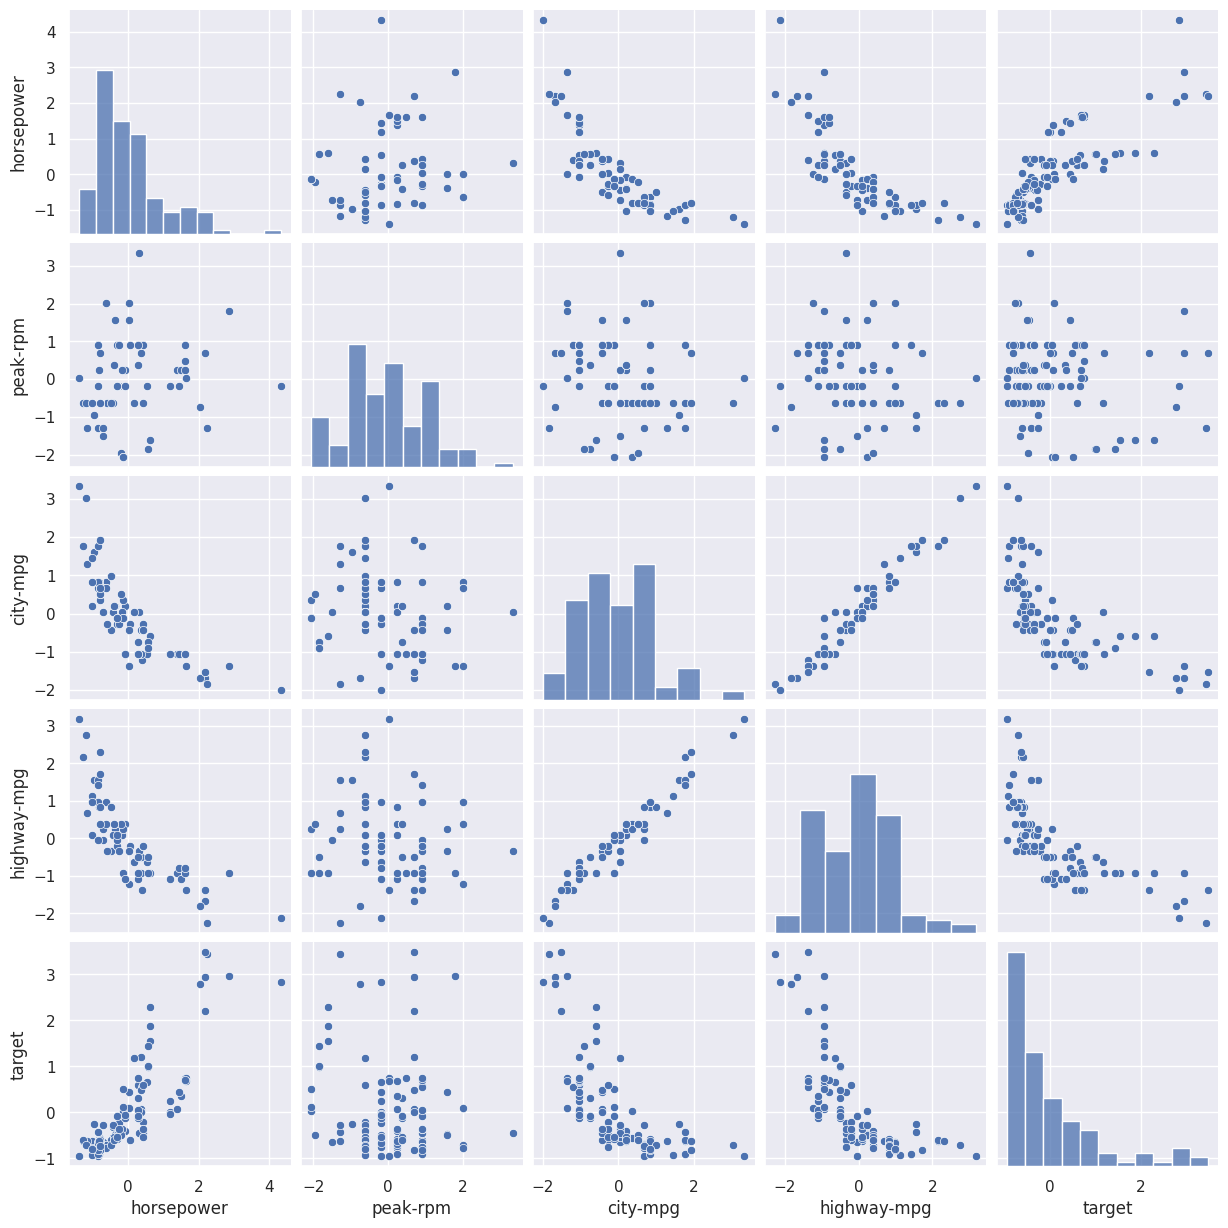

In [9]:
# YOUR CODE HERE
# 1)
# First, we must combine X_train and Y_train into one df. Create a new df
# called X_Y_train_std and combine:
X_Y_train_std = X_train_std.copy()
X_Y_train_std['target'] = Y_train_std

# Next, use Seaborn to create the scatterplot matrix:
sns.pairplot(X_Y_train_std);

# 2)
# It does not appear that any of the variables in the data are normally
# distributed. Although we would like to include features/variables that
# are normally distributed, it is not necessary in ML.

### <span style="color:chocolate">Exercise 8:</span> Correlation matrix (10 points)

In this exercise you will:

1. Plot a correlation matrix in the form of a heatmap to visualize the linear relationships between different features and outcome in the (X_train_std, Y_train) data. Hint: this example here is very useful: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
    
2. Answer the following questions:
 - Which two features are likely to be most redundant?
 - Which feature is likely to be least useful for predicting price?

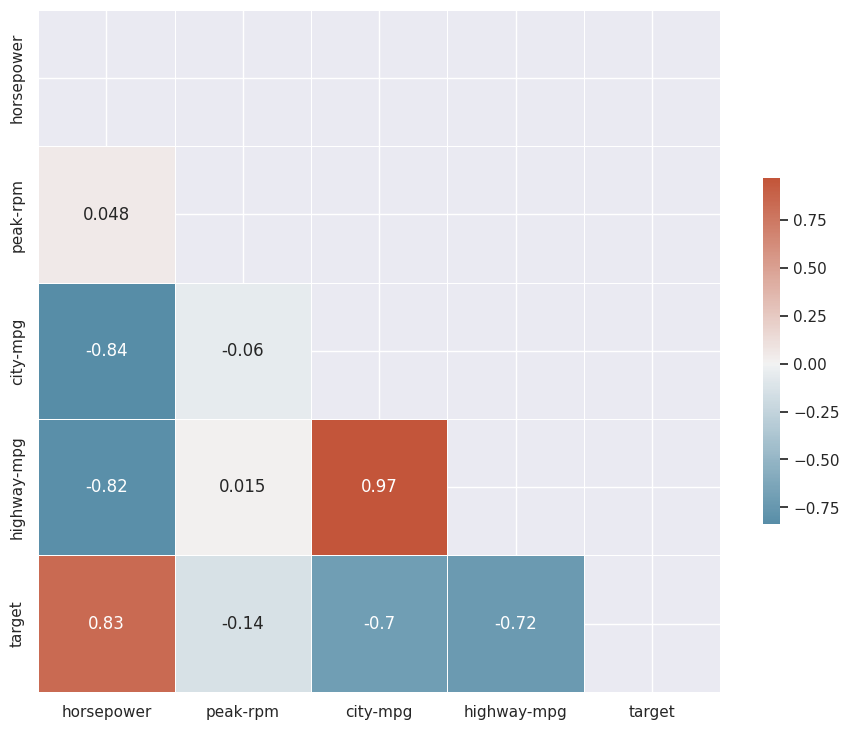

In [10]:
# YOUR CODE HERE
# 1)
# First, generate the correlation matrix:
corr = X_Y_train_std.corr()

# Next, generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5});

# 2)
# The two features that are most redundant are city-mpg and highway-mpg.

# The feature that is least useful in predicting price appears to be city-mpg.

---
### Step 4: Modeling

### <span style="color:chocolate">Exercise 9:</span> Baseline model (5 points)

Let's start by evaluating a baseline model. Precisely, you'll use the average price of cars in the training set as our baseline model -- that is, the baseline always predicts the average price regardless of the input.

1. Implement this baseline using the Y_train_std data and print the average price. Note: You can revert the price variable to the original scale for interpretation purposes.

In [11]:
# YOUR CODE HERE
# 1)
# Calculate the mean value and revert it back to the original scale:
baseline_model = (Y_train_std.mean() * y_stdev) + y_mu
print('Baseline Model:\n', baseline_model)

Baseline Model:
 price    12889.008403
dtype: float64


### <span style="color:chocolate">Exercise 10:</span> Improvement over Baseline with TensorFlow (10 points)

Let's train a linear regression model much like we did in the previous assignment, but this time using TensorFlow.

1. Fill in the <span style="color:green">NotImplemented</span> parts of the build_model() function below by following the instructions provided as comments. Hint: refer to Demo 3 in [bCourses/Modules/Live Session Demos](https://bcourses.berkeley.edu/courses/1534588/files/88733489?module_item_id=17073646) for an example.
2. Build and compile a model using the build_model() function and the (X_train_std, Y_train_std) data. Set learning_rate = 0.0001. Call the resulting object *model_tf*.
3. Train *model_tf* using the (X_train_std, Y_train_std) data. Set num_epochs = 5. Pass the (X_val_std, Y_val_std) data for validation. Hint: see the documentation behind the [tf.keras.Model.fit()](https://bcourses.berkeley.edu/courses/1534588/files/88733489?module_item_id=17073646) method.
3. Generate a plot with the loss values on the y-axis and the epoch number on the x-axis for visualization. Make sure to include axes name and title. Hint: check what the [tf.keras.Model.fit()](https://bcourses.berkeley.edu/courses/1534588/files/88733489?module_item_id=17073646) method returns.

More notes on point 1: the idea is to build a *computational graph* for linear regression, and then send data through it. There are many ways to build graphs, but [TenforFlow Keras API](https://www.tensorflow.org/api_docs/python/tf/keras) is recommended.

In [12]:
def build_model(num_features, learning_rate):
  """Build a TF linear regression model using Keras.

  Args:
    num_features: The number of input features.
    learning_rate: The desired learning rate for SGD.

  Returns:
    model: A tf.keras model (graph).
  """
  # This is not strictly necessary, but each time you build a model, TF adds
  # new nodes (rather than overwriting), so the colab session can end up
  # storing lots of copies of the graph when you only care about the most
  # recent. Also, as there is some randomness built into training with SGD,
  # setting a random seed ensures that results are the same on each identical
  # training run.
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  # Build a model using keras.Sequential. While this is intended for neural
  # networks (which may have multiple layers), we want just a single layer for
  # linear regression.
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(
      units=1,                                 # output dim
      input_shape=[num_features],              # input dim
      use_bias=True,                           # use a bias (intercept) param
      kernel_initializer=tf.ones_initializer,  # initialize params to 1
      bias_initializer=tf.ones_initializer,    # initialize bias to 1
  ))

  # We need to choose an optimizer. We'll use GD, which is actually mini-batch GD
  optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

  # Finally, compile the model. This finalizes the graph for training.
  # We specify the loss and the optimizer above
  model.compile(
        optimizer=optimizer,
        loss='mse',
    )

  return model

Epoch 1/5
4/4 [==============================] - 1s 98ms/step - loss: 6.0653 - val_loss: 4.8144
Epoch 2/5
4/4 [==============================] - 0s 22ms/step - loss: 6.0475 - val_loss: 4.8036
Epoch 3/5
4/4 [==============================] - 0s 22ms/step - loss: 6.0303 - val_loss: 4.7926
Epoch 4/5
4/4 [==============================] - 0s 24ms/step - loss: 6.0127 - val_loss: 4.7817
Epoch 5/5
4/4 [==============================] - 0s 24ms/step - loss: 5.9956 - val_loss: 4.7710


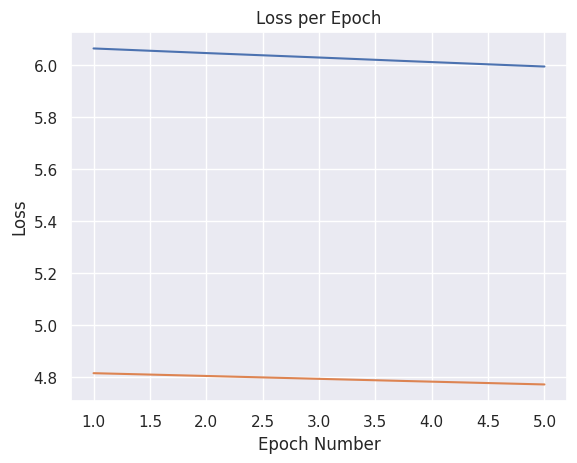

In [13]:
tf.random.set_seed(0)
# 2. Build and compile model
num_features = X_train_std.shape[1]
model_tf = build_model(num_features=num_features, learning_rate=0.0001)

# 3. Fit the model
model_tf_fit = model_tf.fit(x=X_train_std,
                            y=Y_train_std,
                            epochs=5,
                            validation_data=(X_val_std, Y_val_std))

# Store the loss values as a list and create a corresponding epoch range for plotting:
model_tf_loss = model_tf_fit.history['loss']
model_tf_epochs = np.arange(1, len(model_tf_loss) + 1)

model_tf_val_loss = model_tf_fit.history['val_loss']

# Plotting the results:
plt.plot(model_tf_epochs, model_tf_loss)
plt.plot(model_tf_epochs, model_tf_val_loss)

# Setting labels/title:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.title('Loss per Epoch');

---
### Step 5: Hyperparameter tuning

Hyperparameter tuning is a crucial step in optimizing ML models. It involves systematically adjusting hyperparameters such as learning rate, number of epochs, and optimizer to find the model configuration that leads to the best generalization performance.

This tuning process is typically conducted by monitoring the model's performance on the validation vs. training set. It's important to note that using the test set for hyperparameter tuning can compromise the integrity of the evaluation process by violating the assumption of "blindness" of the test data.

### <span style="color:chocolate">Exercise 11:</span> Hyperparameter tuning (10 points)

1. Fine-tune the hyperparameters of *model_tf* to determine the setup that yields the most optimal generalization performance. Feel free to explore various values for the hyperparameters. Hint: ask your instructors and TAs for help if in doubt.

After identifying your preferred model configuration, print the following information:

2. The learned parameters of the model (this should include the bias term). Hint: use  <span style="color:chocolate">model_tf.layers[0].get_weights()</span>.
3. The loss at the final epoch on both the training and validation datasets;
4. The percentage difference between the losses observed on the training and validation datasets.


Please note that we will consider 'optimal model configuration' any last-epoch loss that is below 0.35.

Epoch 1/5
4/4 [==============================] - 1s 81ms/step - loss: 6.0653 - val_loss: 4.8144
Epoch 2/5
4/4 [==============================] - 0s 21ms/step - loss: 6.0475 - val_loss: 4.8036
Epoch 3/5
4/4 [==============================] - 0s 30ms/step - loss: 6.0303 - val_loss: 4.7926
Epoch 4/5
4/4 [==============================] - 0s 22ms/step - loss: 6.0127 - val_loss: 4.7817
Epoch 5/5
4/4 [==============================] - 0s 23ms/step - loss: 5.9956 - val_loss: 4.7710
Epoch 1/10
4/4 [==============================] - 1s 87ms/step - loss: 6.0653 - val_loss: 4.8144
Epoch 2/10
4/4 [==============================] - 0s 24ms/step - loss: 6.0475 - val_loss: 4.8036
Epoch 3/10
4/4 [==============================] - 0s 14ms/step - loss: 6.0303 - val_loss: 4.7926
Epoch 4/10
4/4 [==============================] - 0s 12ms/step - loss: 6.0127 - val_loss: 4.7817
Epoch 5/10
4/4 [==============================] - 0s 12ms/step - loss: 5.9956 - val_loss: 4.7710
Epoch 6/10
4/4 [===================

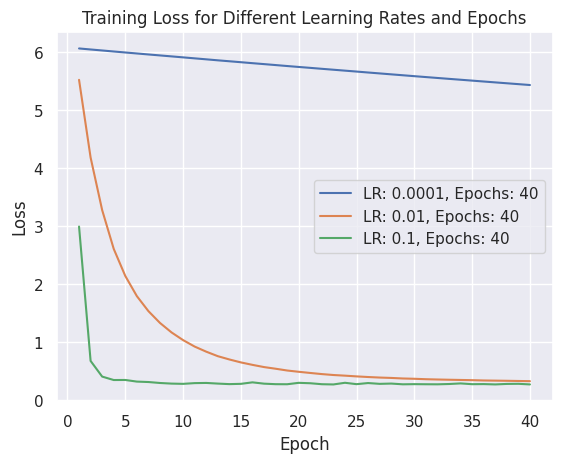

In [14]:
tf.random.set_seed(0)
# YOUR CODE HERE
# 1)
# To visualize how changing the learning rate and epoch number will change the
# model, we can perform some initial testing using a range of each:

learning_rates = [0.0001, 0.01, 0.1]
epochs = [5, 10, 20, 40]

for learning_rate in learning_rates:
  for epoch in epochs:

    # 2. Build and compile model
    num_features = X_train_std.shape[1]
    model_tf = build_model(num_features=num_features, learning_rate=learning_rate)

    # 3. Fit the model
    model_tf_fit = model_tf.fit(x=X_train_std,
                            y=Y_train_std,
                            epochs=epoch,
                            validation_data=(X_val_std, Y_val_std))

    # Store the loss values as a list and create a corresponding epoch range for plotting:
    model_tf_loss = model_tf_fit.history['loss']
    model_tf_epochs = np.arange(1, len(model_tf_loss) + 1)

  plt.plot(model_tf_epochs, model_tf_loss, label=f'LR: {learning_rate}, Epochs: {epoch}')

    # Add labels and title
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Training Loss for Different Learning Rates and Epochs')
  plt.legend();

In [15]:
# From the visualization above, we can see that both increasing the learning rate
# and epoch number improves out model by minimizing loss. We will choose a learning
# rate of 0.01 and epoch number of 40, as the learning rate of 0.1 appears to
# fluctuate after it bottoms out.

# 2)
# Build and compile chosen model:

learning_rate = 0.01
num_features = X_train_std.shape[1]
model_tf = build_model(num_features=num_features, learning_rate=learning_rate)

# Fit the chosen model:
model_tf_fit = model_tf.fit(x=X_train_std,
                            y=Y_train_std,
                            epochs=40,
                            validation_data=(X_val_std, Y_val_std))

# Print the learned parameters of the model (this should include the bias term):
print('Learned parameters:\n', model_tf.layers[0].get_weights())

# 3)
# Print the loss at the final epoch on both the training and validation datasets:
model_tf_loss = model_tf_fit.history['loss'][-1]
model_tf_val_loss = model_tf_fit.history['val_loss'][-1]

print('The training loss at the final epoch: ', model_tf_loss)
print('The validation loss at the final epoch: ', model_tf_val_loss)

# 4)
# Print the percentage difference between the losses observed on the training and validation datasets:
diff = ((model_tf_val_loss - model_tf_loss) / model_tf_loss)*100
print('% Difference = ', diff)

Epoch 1/40
4/4 [==============================] - 1s 93ms/step - loss: 5.5239 - val_loss: 3.8713
Epoch 2/40
4/4 [==============================] - 0s 23ms/step - loss: 4.1828 - val_loss: 3.2423
Epoch 3/40
4/4 [==============================] - 0s 25ms/step - loss: 3.2757 - val_loss: 2.7715
Epoch 4/40
4/4 [==============================] - 0s 25ms/step - loss: 2.6069 - val_loss: 2.4317
Epoch 5/40
4/4 [==============================] - 0s 22ms/step - loss: 2.1395 - val_loss: 2.1654
Epoch 6/40
4/4 [==============================] - 0s 18ms/step - loss: 1.7917 - val_loss: 1.9520
Epoch 7/40
4/4 [==============================] - 0s 12ms/step - loss: 1.5328 - val_loss: 1.7773
Epoch 8/40
4/4 [==============================] - 0s 15ms/step - loss: 1.3290 - val_loss: 1.6248
Epoch 9/40
4/4 [==============================] - 0s 12ms/step - loss: 1.1653 - val_loss: 1.4972
Epoch 10/40
4/4 [==============================] - 0s 18ms/step - loss: 1.0324 - val_loss: 1.3781
Epoch 11/40
4/4 [============

---
### Step 6: Evaluation and Generalization


Now that you've determined the optimal set of hyperparameters, it's time to evaluate your optimized model on the test data to gauge its performance in real-world scenarios, commonly known as inference.

### <span style="color:chocolate">Exercise 12:</span> Computing MSE (10 points)

1. Calculate MSE on both (X_train_std, Y_train_std) and (X_test_std, Y_test_std) datasets. Hint: You can utilize the <span style="color:chocolate">model.evaluate()</span> method provided by tf.keras.

2. Does the model demonstrate strong generalization capabilities? Provide an explanation based on your observations.

4. Generate a plot to visualize the accuracy of the predictions. Plot the actual (observed) Y_test values on the x-axis and the predicted Y_test values on the y-axis. Additionally, include a 45-degree line in the plot for reference. Ensure that the plot contains appropriate axis labels and a title. Provide commentary on the model's fit based on this visualization. Hint: You can utilize the <span style="color:chocolate">model.predict()</span> method available in tf.keras.

2/2 [==============================] - 0s 7ms/step - loss: 0.5187
MSE of the Training Dataset:  0.3224181532859802
MSE of the Testing Dataset:  0.5186980962753296
2/2 [==============================] - 0s 6ms/step


Text(0.5, 1.0, 'Model Predicted Values vs. Observed Values')

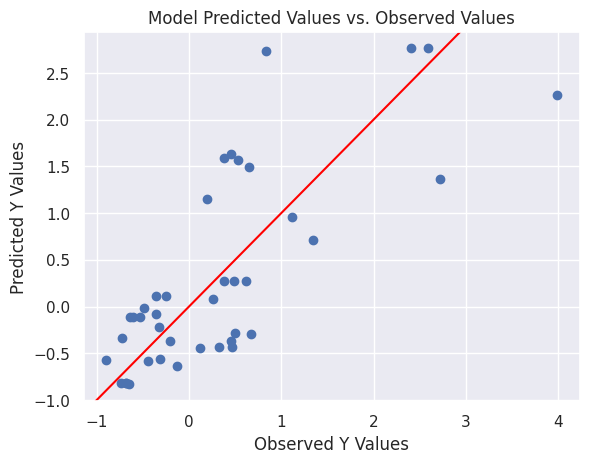

In [16]:
# YOUR CODE HERE
# 1)
# Calculate MSE on both training and testing datasets:
mse_training = model_tf.evaluate(x=X_train_std, y=Y_train_std)
mse_test = model_tf.evaluate(x=X_test_std, y=Y_test_std)

print('MSE of the Training Dataset: ', mse_training)
print('MSE of the Testing Dataset: ', mse_test)

# 2)
# The model seems to demonstrate some good generalization capabilities. When
# we use the model on the testing dataset, we find that the loss value is actually
# higher than when we use the model against the training data, suggesting that
# the model is not overfitting. Although the loss is higher, it is not significantly
# higher, and thus suggests good generalization.

# 3)
# Generate a plot to visualize the accuracy of the predictions.

# First, create a variable to store predictions of X_test data using our model:
model_tf_predict = model_tf.predict(X_test_std)

# Next, generate a scatter plot of Y_test_std against our new predictions:
plt.scatter(x=Y_test_std, y=model_tf_predict)
plt.axline([0, 0], [1, 1], color = 'red')
plt.xlabel('Observed Y Values')
plt.ylabel('Predicted Y Values')
plt.title('Model Predicted Values vs. Observed Values')

# A great learned model would have values that are randomly dispersed about
# the y=x line. From our scatter plot below, it appears that this is the case
# with the lower target values, but it appears that the variance increases
# as the target values increase. This suggests that there might be some underlying
# errors in the model that we could look to improve so that we have a nice even
# distribution about the y=x line.


----
### <span style="color:chocolate">Bonus question</span> (20 points)

In Exercise 12, you reported an aggregated MSE. Let's revisit the exercise by:

1. Conducting a subgroup model evaluation. More precisely, compute the test data MSE based on various car subgroups such as make, engine size, fuel type, etc.

2. Answering the question: is the model "fair" to your chosen car subgroups in our data?

In [17]:
# YOUR CODE HERE